<a href="https://colab.research.google.com/github/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2d_python_II_CFDdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with python II (CFD data formats)

## Wladimir E. Banda-Barragán

In this tutorial, we will learn to open datasets that are stored in different scientific data formats:

- Binary format
- NetCDF
- HDF5
- VTK
- FITS

Please download the files from here:

https://drive.google.com/drive/folders/1Ms4uNAE4iGgZgPM31asgURONZnX4Et4h?usp=sharing


# 1. Binary data format

Binary data refers to raw data.

- It can be written in single precission (4 bytes = 32 bits) or double (8 bytes = 64 bits) precission.

- This means no headers, no metadata, and no information on the structure of the files are included in the data.

- Then, we need to know what sort of structure the data are stored in beforehand, otherwise we can only guess.

- Sometimes guessing is possible because we can calculate the shape of the arrays based on the size of the file.

- In this case I generated the file beta_temp.dbl, so I know it has a 2D array of 160 x 160 grid cells in double precission.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


# To display the contents
!ls "/content/drive/My Drive"

Mounted at /content/drive
'Colab Notebooks'
 EPIC-2-preliminary-programme.gsheet
'EPIC 2 presenters bios.gdoc'
 EPIC-2-programme.gsheet
 EPIC.gform
 LatitudCero-En.gsite
 LatitudCero.gsite
 Posters_Certificados
'Registro de charlas para conferencistas - Talk registration form (File responses)'


In [3]:
import numpy as np

dtype = np.dtype(np.float64)

#open can be used to examine the file
dens = open("/content/drive/My Drive/Colab Notebooks/simulation_data/beta_temp.dbl", "rb")
data = np.fromfile(dens, dtype=dtype)
data2d = np.reshape(data,(160,160))
data2darr = np.array(data2d)
print(data2darr.shape)
print(dtype)

(160, 160)
float64


### Let us make some plots of these data:

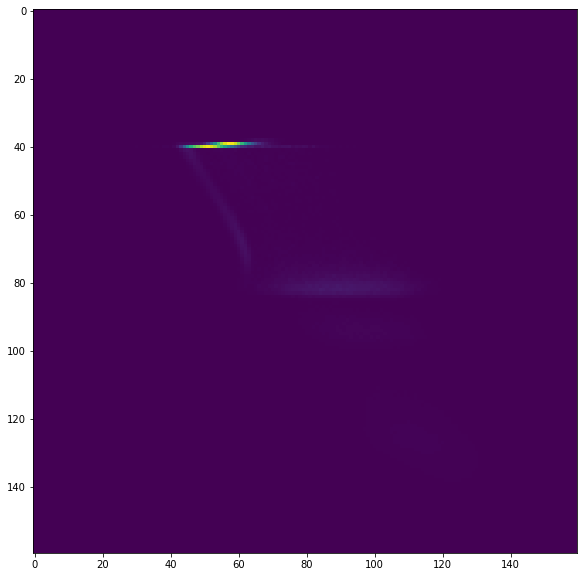

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


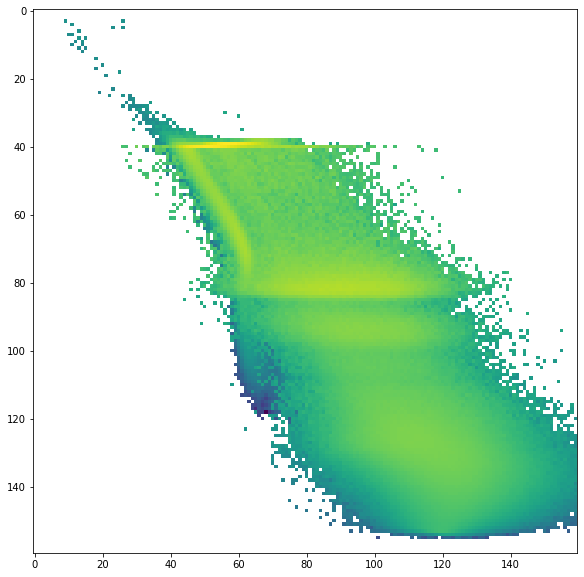

In [53]:
import matplotlib as mpl
from matplotlib import pyplot as plt

plt.figure(figsize = (12,10))
plt.imshow(data2darr)
plt.show()

plt.figure(figsize = (12,10))
plt.imshow(np.log10(data2darr))
plt.show()

# 2. NetCDF

This is the favourite format of Earth scientists, particularly climate/weather researchers.

- This is a self-describing data format. This means it does not need a descriptor file to be read, but all the necessary metadata to understand the file structure and content is embedded in the format.


- It contains three sections:


    - DIMENSIONS, which indicates how the data are organised in the file.

    - VARIABLES, which contains information on both the data values and metadata, including some attributes such as units, each variable can have different shapes (e.g. 3D or 2D).

    - GENERAL INFORMATION, which displays the main file properties, such as version of the library, date, and copyright information.


In [6]:
import netCDF4 as nc

#Data downloaded from this repository: https://www.unidata.ucar.edu/software/netcdf/examples/files.html

fn = '/content/drive/My Drive/Colab Notebooks/simulation_data/tos_O1_2001-2002.nc'
ds = nc.Dataset(fn)

Let us see the metadata of this file:

In [7]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment
    institution: IPSL (Institut Pierre Simon Laplace, Paris, France)
    source: IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v
    contact: Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id: IPCC Fourth Assessment
    table_id: Table O1 (13 November 2004)
    experiment_id: SRES A2 experiment
    realization: 1
    cmor_version: 0.96
    Conventions: CF-1.0
    history: YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements
    references: Dufresne et al, Journal of Climate, 2015, vol XX, p 136
    comment: Test drive
    dimensions(sizes): lon(180), lat(170), time(24), bnds(2)
    variables(dime

In [8]:
print(ds.__dict__['source'])

IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v


In [9]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 170
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 24
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2


In [10]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
    original_units: degrees_east
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lon_bnds(lon, bnds)
unlimited dimensions: 
current shape = (180, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
    original_units: degrees_north
unlimited dimensions: 
current shape = (170,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (170, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 ti

In [11]:
print(ds['tos'])

<class 'netCDF4._netCDF4.Variable'>
float32 tos(time, lat, lon)
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature
    units: K
    cell_methods: time: mean (interval: 30 minutes)
    _FillValue: 1e+20
    missing_value: 1e+20
    original_name: sosstsst
    original_units: degC
    history:  At   16:37:23 on 01/11/2005: CMOR altered the data in the following ways: added 2.73150E+02 to yield output units;  Cyclical dimension was output starting at a different lon;
unlimited dimensions: time
current shape = (24, 170, 180)
filling on


In [12]:
tos_data = ds['tos'][:]

print(tos_data.shape)

tos_data1 = tos_data[1,:,:]

print(tos_data1.shape)

(24, 170, 180)
(170, 180)


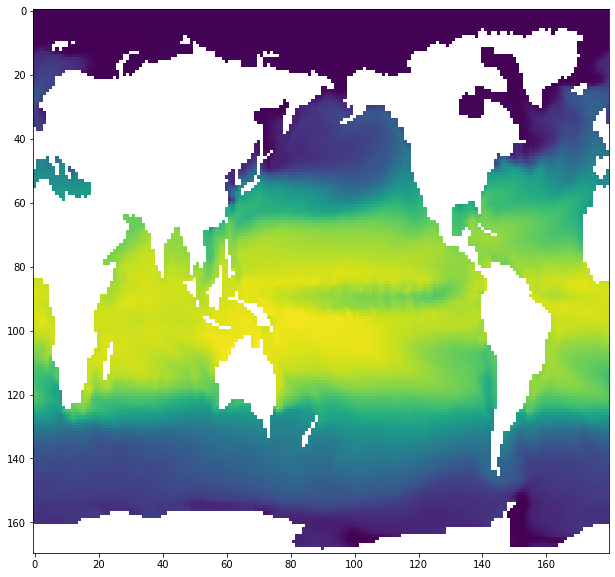

In [54]:
plt.figure(figsize = (12,10))
plt.imshow(np.flipud(np.log10(tos_data1)))
plt.show()

# 3. Hierarchical Data Format v5 (HDF5)

This is also a self-descriptive format, which is widely used in many physics sub-fields because of its versatility.

- Data stored here can be very large!


- Data don't have to be of the same type, you can save numbers, units, strings, images, etc, all in the same file.


- It uses the structure of a file directory, organising information in GROUPS.


- GROUPS are then comprised of data fields with their own metadata.

In [19]:
!pip install nexusformat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 5.9 MB/s 


In [46]:
# File taken from the Trident ion_table database.
# See: http://trident-project.org/data/ion_table/

import nexusformat.nexus as nx
f = nx.nxload("/content/drive/My Drive/Colab Notebooks/simulation_data/hm2012_lr.h5")
print(f.tree)

root:NXroot
  Al = >f4(14x27x25x161)
    @Parameter1 = [-9.  -8.5 -8.  ...  3.   3.5  4. ]
    @Parameter2 = [ 0.       0.12202  0.25893 ... 11.589   13.12...
    @Temperature = [1.   1.05 1.1  ... 8.9  8.95 9.  ]
  Ar = >f4(19x27x25x161)
    @Parameter1 = [-9.  -8.5 -8.  ...  3.   3.5  4. ]
    @Parameter2 = [ 0.       0.12202  0.25893 ... 11.589   13.12...
    @Temperature = [1.   1.05 1.1  ... 8.9  8.95 9.  ]
  B = >f4(6x27x25x161)
    @Parameter1 = [-9.  -8.5 -8.  ...  3.   3.5  4. ]
    @Parameter2 = [ 0.       0.12202  0.25893 ... 11.589   13.12...
    @Temperature = [1.   1.05 1.1  ... 8.9  8.95 9.  ]
  Be = >f4(5x27x25x161)
    @Parameter1 = [-9.  -8.5 -8.  ...  3.   3.5  4. ]
    @Parameter2 = [ 0.       0.12202  0.25893 ... 11.589   13.12...
    @Temperature = [1.   1.05 1.1  ... 8.9  8.95 9.  ]
  C = >f4(7x27x25x161)
    @Parameter1 = [-9.  -8.5 -8.  ...  3.   3.5  4. ]
    @Parameter2 = [ 0.       0.12202  0.25893 ... 11.589   13.12...
    @Temperature = [1.   1.05 1.1  ...

In [47]:
import h5py
filename = "/content/drive/My Drive/Colab Notebooks/simulation_data/hm2012_lr.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['Al', 'Ar', 'B', 'Be', 'C', 'Ca', 'Cl', 'Co', 'Cr', 'Cu', 'F', 'Fe', 'H', 'He', 'K', 'Li', 'Mg', 'Mn', 'N', 'Na', 'Ne', 'Ni', 'O', 'P', 'S', 'Sc', 'Si', 'Ti', 'V', 'Zn']>


In [48]:
ff = h5py.File('/content/drive/My Drive/Colab Notebooks/simulation_data/hm2012_lr.h5', 'r')
list(ff.items())

[('Al', <HDF5 dataset "Al": shape (14, 27, 25, 161), type ">f4">),
 ('Ar', <HDF5 dataset "Ar": shape (19, 27, 25, 161), type ">f4">),
 ('B', <HDF5 dataset "B": shape (6, 27, 25, 161), type ">f4">),
 ('Be', <HDF5 dataset "Be": shape (5, 27, 25, 161), type ">f4">),
 ('C', <HDF5 dataset "C": shape (7, 27, 25, 161), type ">f4">),
 ('Ca', <HDF5 dataset "Ca": shape (21, 27, 25, 161), type ">f4">),
 ('Cl', <HDF5 dataset "Cl": shape (18, 27, 25, 161), type ">f4">),
 ('Co', <HDF5 dataset "Co": shape (28, 27, 25, 161), type ">f4">),
 ('Cr', <HDF5 dataset "Cr": shape (25, 27, 25, 161), type ">f4">),
 ('Cu', <HDF5 dataset "Cu": shape (30, 27, 25, 161), type ">f4">),
 ('F', <HDF5 dataset "F": shape (10, 27, 25, 161), type ">f4">),
 ('Fe', <HDF5 dataset "Fe": shape (27, 27, 25, 161), type ">f4">),
 ('H', <HDF5 dataset "H": shape (2, 27, 25, 161), type ">f4">),
 ('He', <HDF5 dataset "He": shape (3, 27, 25, 161), type ">f4">),
 ('K', <HDF5 dataset "K": shape (20, 27, 25, 161), type ">f4">),
 ('Li', <H

In [49]:
dset = ff['O']
dset.shape

(9, 27, 25, 161)

In [51]:
dset[0][20].shape

(25, 161)

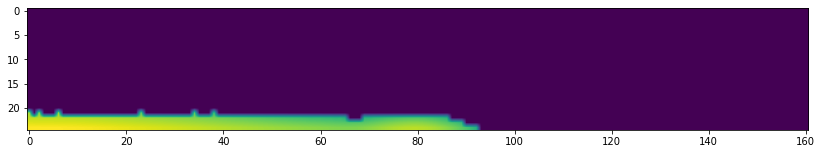

In [57]:
plt.figure(figsize = (14,20))
plt.imshow(dset[0][0], interpolation='bilinear')
plt.show()

## 4. Visualization ToolKit (VTK) format

https://vtk.org/

This format is an open-source data format, developed by Kitware, and widely used in computational fluid dynamics and computer graphics applications. There are two sub-formats, legacy and XML.

### VTK file structure:

1. File version and ID.

2. Header, comments with informaton on the dataset.

3. Data type, which can be Binary or ASCII.

4. Domain structure, mesh/grid information:

- DATASET
    - STRUCTURED_GRID
    - UNSTRUCTURED_GRID
    - RECTILINEAR_GRID
    - POLYDATA
    - FIELD
    
- Coordinates, Dimensions, Grid spacing.

5. Attributes

- Values stored at grid cells, e.g. scalars, vectors, tensors.

Imagen tomada de: http://victorsndvg.github.io/FEconv/formats/vtk.xhtml

![](https://drive.google.com/uc?id=1SZR76Q19ixrM5olFiYhw-w17oaAccqQ3)

In [23]:
!pip install pyvista

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 30.5 MB/s 
     |████████████████████████████████| 79.3 MB 1.2 MB/s 


In [30]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

We define the input directory and file name:

In [31]:
# Downloaded from: https://people.sc.fsu.edu/~jburkardt/data/vtk/vtk.html

input_directory="/content/drive/My Drive/Colab Notebooks/simulation_data/"
file_name = "shock-cloud.vtk"

In [35]:
# Here we include some lines to select the file we want to read

mesh = pv.read(input_directory+file_name)

print(mesh)

RectilinearGrid (0x7f6f02c11d70)
  N Cells:	1000000
  N Points:	1030301
  X Bounds:	-5.000e+00, 1.500e+01
  Y Bounds:	-1.000e+01, 1.000e+01
  Z Bounds:	-1.000e+01, 1.000e+01
  Dimensions:	101, 101, 101
  N Arrays:	6



As we can see the data consists of a 3D grid of 100x100x100 cells/pixels, i.e. 1.e6 grid cells/pixels in total.

The data are organised in 6 arrays:

    Number Of Arrays: 6
    Array 0 name = rho
    Array 1 name = vx1
    Array 2 name = vx2
    Array 3 name = vx3
    Array 4 name = prs
    Array 5 name = tr1
    
  Bounds: 
    Xmin,Xmax: (-5, 15)
    Ymin,Ymax: (-10, 10)
    Zmin,Zmax: (-10, 10)
  Compute Time: 0
  Dimensions: (101, 101, 101)
  X Coordinates: 0x7fbefd475a70
  Y Coordinates: 0x7fbefd476cf0
  Z Coordinates: 0x7fbefd476fc0
  Extent: 0, 100, 0, 100, 0, 100    
    
Which we can now read with:

In [39]:
# Now, we read all the scalar and vector quantities
rho = pv.get_array(mesh, "rho", preference = 'cell') #density in code units
vx1 = pv.get_array(mesh, "vx1", preference = 'cell') #vx in code units
vx2 = pv.get_array(mesh, "vx2", preference = 'cell') #vy in code units
vx3 = pv.get_array(mesh, "vx3", preference = 'cell') #vy in code units
tr1 = pv.get_array(mesh, "tr1", preference = 'cell') #vy in code units

In [40]:
# Now, let's have a first look into the data
print(rho.shape)

(1000000,)


Therefore, we need to re-shape the array into 3D.

We can use the information on the dimensions from teh original VTK file.

In [41]:
rho_3D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1, mesh.dimensions[2] - 1)
vx1_3D = vx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1, mesh.dimensions[2] - 1)
vx2_3D = vx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1, mesh.dimensions[2] - 1)
vx3_3D = vx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1, mesh.dimensions[2] - 1)
tr1_3D = tr1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1, mesh.dimensions[2] - 1)

However, after reading the data, we notice that we have 1D arrays, instead of 2D. 


In [42]:
print(np.shape(rho_3D))

(100, 100, 100)


As we can see, the original density array has been converted from 1D to 3D.

# 3D Array manipulation

In [43]:
# We can slice arrays
A = rho_3D[:,50,:]

# We can transpose arrays
B = rho_3D[:,50,:].T

# We can multiply both
C = A*B

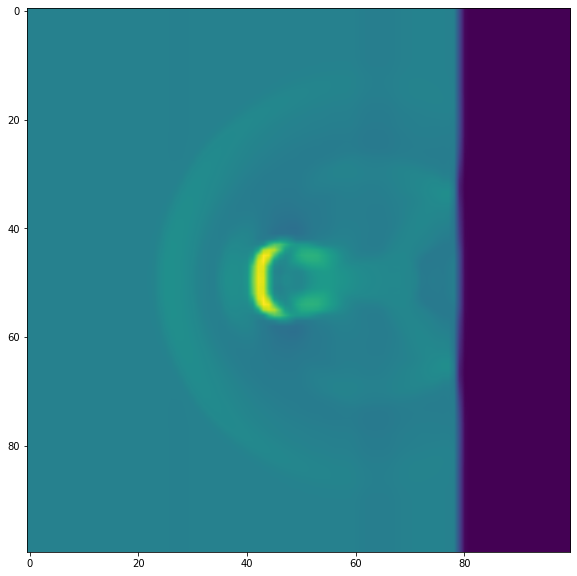

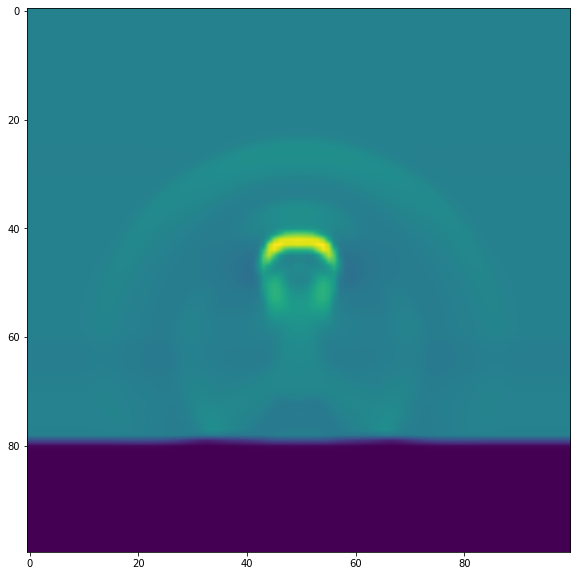

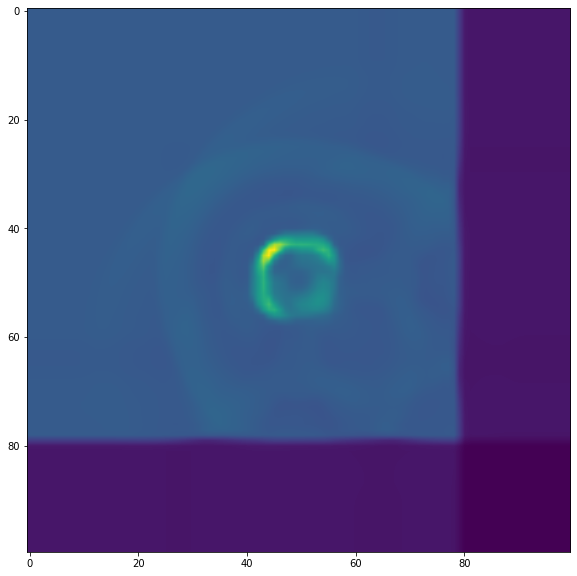

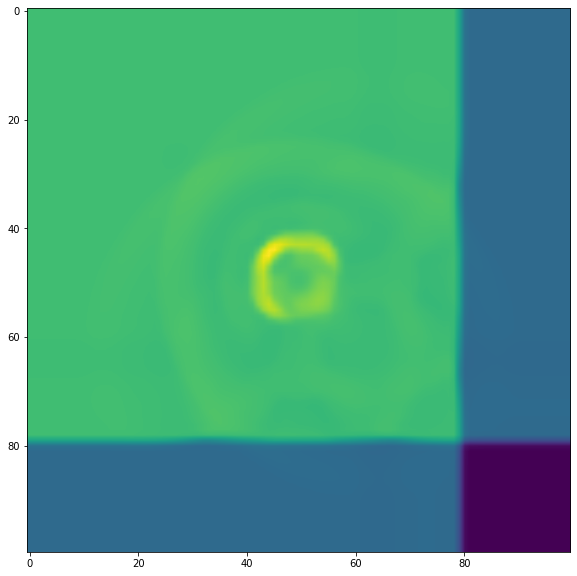

In [58]:
# Density map
plt.figure(figsize = (12,10))
plt.imshow(A, interpolation='bilinear')
plt.show()

plt.figure(figsize = (12,10))
plt.imshow(B, interpolation='bilinear')
plt.show()

plt.figure(figsize = (12,10))
plt.imshow(C, interpolation='bilinear')
plt.show()

# Now let us try with a log scale
plt.figure(figsize = (12,10))
plt.imshow(np.log10(C), interpolation='bilinear')
plt.show()

# 5. Flexible Image Transport System (FITS) format

This is the preferred data format used in observational astronomy.

- It is mainly used as a standard format to share astronomical images (see Helga's talk).


- But it can also contain tables or cubes, e.g. position-position-velocity diagrams.


- It has a header with metadata related to the image.


- It is much simpler than the previous formats we checked above, but very practical.

In [60]:
from astropy.io import fits

fits_image1 = fits.open('/content/drive/My Drive/Colab Notebooks/simulation_data/vorticity.fits')

vorticity = fits_image1[0].data

In [61]:
print(fits_image1)

In [62]:
print(vorticity.shape)

(256, 1280, 256)


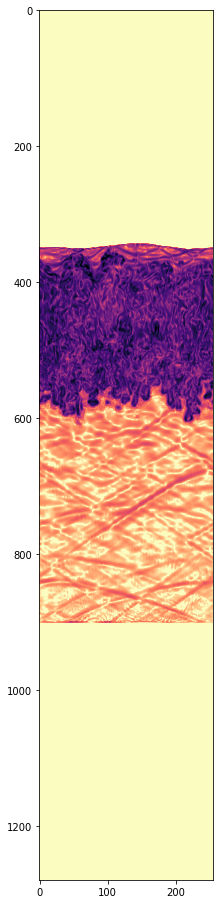

In [63]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,16))

vort = np.flipud(vorticity[:,:,128].T)
vort[vort==0]=1.e-10 
#print(np.min(vort), np.max(vort))
plt.imshow(np.log10(vort), vmin=-1, vmax=5, origin='upper', cmap = 'magma_r')

#plt.xticks([-50, 0, +50], size=26)
#plt.xlim([-50,50])
#plt.ylim([-50,250])
#plt.yticks(size=26)
#plt.show()
#plt.savefig('vorticidad.png'.format(i), dpi=200, bbox_inches='tight')